# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Top 3 Metaverse Crypto Coins With a Market Cap Below $60 Million (March 2022).  This week, cryptocurrency markets continue to trade sideways as Bitcoin and Ethereum manage to hold support. Metaverse Crypto coins show bullish signs, with many seeing single-digit percent price gains this St. Patrick&#8217;s day. Let&#8217;s look at our top pick of the top three Metaverse crypto coins with a market cap below $60 million to watch [&#8230;]The post Top 3 Metaverse Crypto Coins With a Market Cap Below $60 Million (March 2022) appeared first on NullTX. ... [| Skaityti daugiau](https://nulltx.com/top-3-metaverse-crypto-coins-with-a-market-cap-below-60-million-march-2022/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- The National | Mariupol destruction, COVID-19 travel rules, At Issue.  March 17, 2022 | Russian attacks cause extensive damage in Mariupol, Ukraine as reports emerge of survivors at bombed theatre where hundreds took shelter. ... [| Skaityti daugiau](http://www.cbc.ca/player/play/1961983043633) 

### Kainų kaita pandemijos metu

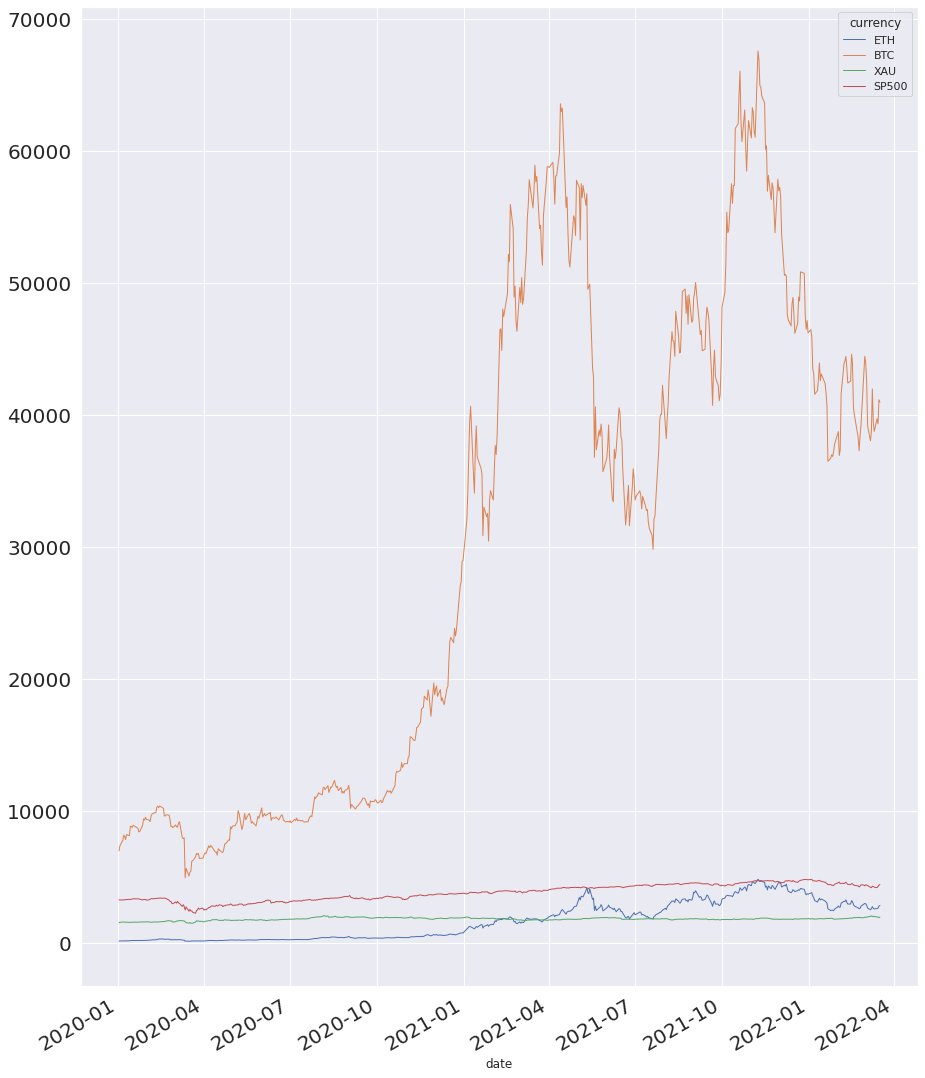

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904029,0.192996,0.920623
BTC,0.904029,1.000000,0.163674,0.872338
XAU,0.192996,0.163674,1.000000,0.331968
SP500,0.920623,0.872338,0.331968,1.000000


In [8]:
#hide ### Koreliacijos matrica.

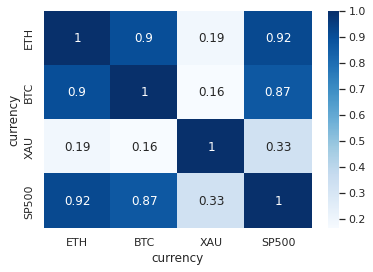

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')